## Tarea 2 MAT281
Sofía Madrid


**Problema 1**


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

a) Notemos que un clasificador lineal usa un hiperplano para poder clasificar o separar dicho de otra forma, entonces notemos que un hiperplano en $\mathbb{R}^2$ es sólo $\mathbb{R}$. por lo que sólo tendriamos una recta en este caso con puntos, entonces lo que ocurre es que tendremos una recta de la forma a-b-b--b--b----a por lo que como es una recta no hay forma de clasificar uniendo sólo los "b" y los "a" consigo mismo, es decir, trazar un hiperplano con los que tienen mismo y. Por ejemplo entre los a siempre habrá un b entre medio, por lo que puede ocurrir que algún b se clasificará como a y viceversa, pues las covariables se traslapaban.

b)Luego de expandir el espacio de la covariable a través del mapeo se obtienen los siguientes valores para $\phi$ \\
$\begin{matrix}
x| & 1 & 5 & 10 & 20 & 40 & 80 \\
y| & 1 & 2.23 & 3.16 & 4.47 & 6.32 & 8.94 \\
\end{matrix}$
lo que al graficar se tiene lo siguiente, que a diferencia del caso anterior, el hiperplano en este caso es una recta, tal como se muestra, por lo que podemos dejar a los "a" separados de los "b".

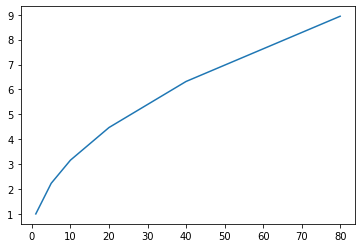

In [3]:
x = [1,5,10,20,40,80]
y = [1,2.23,3.16,4.47,6.32,8.94]

plt.plot(x,y, label = '')

c)

d)

**Pregunta 2**

a) Sabemos que la matriz de confusión representa $\begin{bmatrix}
VP & FP \\
FN &  VN\\
\end{bmatrix}$ donde: Sensibilidad: $TPR = \frac{VP}{VP+FN}$ \\
1 - Especificidad: $FPR= \frac{FP}{FP+VN}$ \\ 
A continuación están los valores correspondientes de cada umbral de decisión.


$\begin{bmatrix}
22 & 3 \\
22 &  15\\
\end{bmatrix}$  $TPR = \frac{22}{22+22} = 0,5 $ ;$FPR = \frac{3}{3+15}=0,1666$

$\begin{bmatrix}
32 & 6 \\
12 &  12\\
\end{bmatrix}$  $TPR = \frac{32}{32+12}=0,72$ ; $FPR = \frac{6}{6+12}=0,3333$

$\begin{bmatrix}
43 & 11 \\
1 &  7\\
\end{bmatrix}$   $TPR = \frac{43}{43+1}=0,97$ ; $FPR = \frac{11}{11+7}=0,6111$


In [44]:
def tp_fp(A):
    tp = A[0][0]/(A[0][0]+A[1][0])
    fp = A[0][1]/(A[0][1]+A[1][1])
    return tp, fp

A = [[22,3],
    [22,15]]
B =[[32, 6], 
    [12,12]]
C = [[43,11], 
     [1,7]]

In [45]:
matrices = [A,B,C]
tpr = [0]
fpr = [0]

for M in matrices:
    tp, fp = tp_fp(M)
    tpr.append(tp)
    fpr.append(fp)

tpr.append(1)
fpr.append(1)

b) A continuación está el bosquejo de la curva ROC en azul y en naranjo está lo que sería una curva ROC mala, con el fin de compararlas.

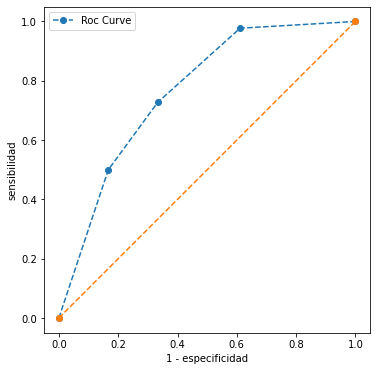

Area bajo la curva (AUC) = 0.7651515151515151


In [50]:
x=np.asarray(fpr)
y=np.asarray(tpr)

plt.figure(figsize=(6,6))
plt.plot(x,y, '--o', label = 'Roc Curve')
plt.plot([0,1],[0,1], '--o', label = '')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('')
plt.xlabel('1 - especificidad')
plt.ylabel('sensibilidad')
plt.legend()
plt.show()

print('Area bajo la curva (AUC) = '+str(metrics.auc(fpr,tpr)))


c) El desempeño del clasificador está entre un desempeño regular y bueno, aunque luego de comparar con el gráfico de TPR versus FPR para diferentes umbrales en la regla de clasificación vista en clase, pues a simple vista notamos que se acerca bastante al 0.8.
Además si nos basamos en el AUC recién calculado, si este es menor a 0.5 significa que estamos teniendo algo interesante, ya que si este valor es muy bajo puede indicar que el problema está mal configurado, en cambio cuando es de 1.0 el clasificador es perfecto. Por lo que como lo obtenido es de 0.76 podemos decir finalmente que el clasificador es bueno y el problema está bien configurado.

**Pregunta 3**

A continuación lo que haremos será abordar el problema de clasificación, eligiendo 3 valores de K distintos, y gráficando el error obtenido en cada uno para así comparar.

In [11]:
import pandas as pd
df = pd.read_csv("/work/datos_T2.txt", sep=' ')
df.describe()

,X1,X2,X3
count,200.000000,200.000000,200.000000
mean,0.464433,0.647388,0.500000
std,1.553136,1.299447,0.501255
min,-2.964698,-2.736292,0.000000
25%,-0.496738,-0.156897,0.000000
50%,0.696095,0.759255,0.500000
75%,1.599239,1.513521,1.000000
max,3.216551,3.813155,1.000000


In [43]:
X = df[['X1','X2']]
y = df['X3']

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

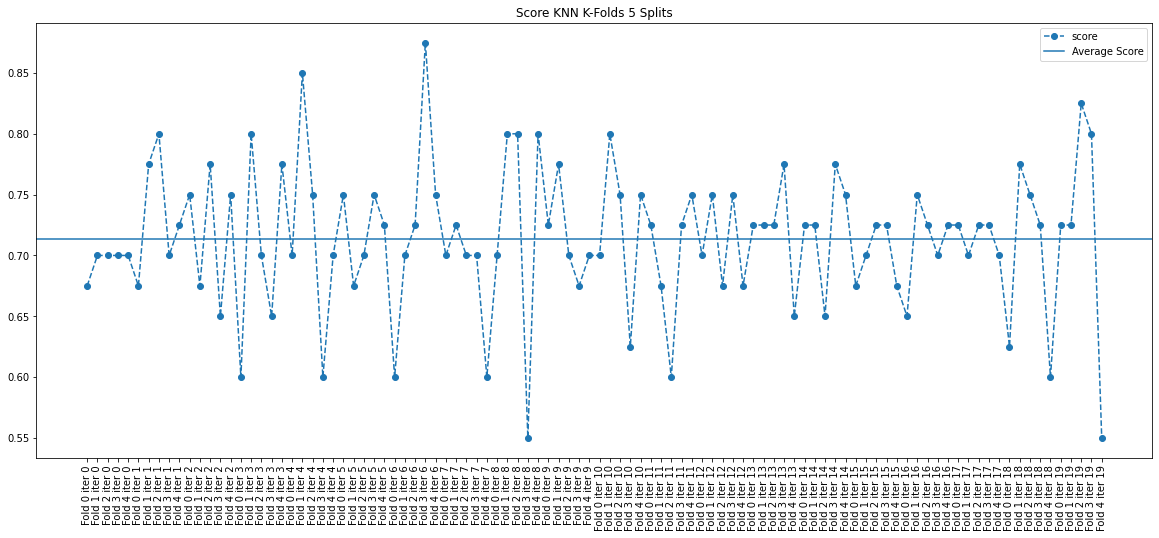

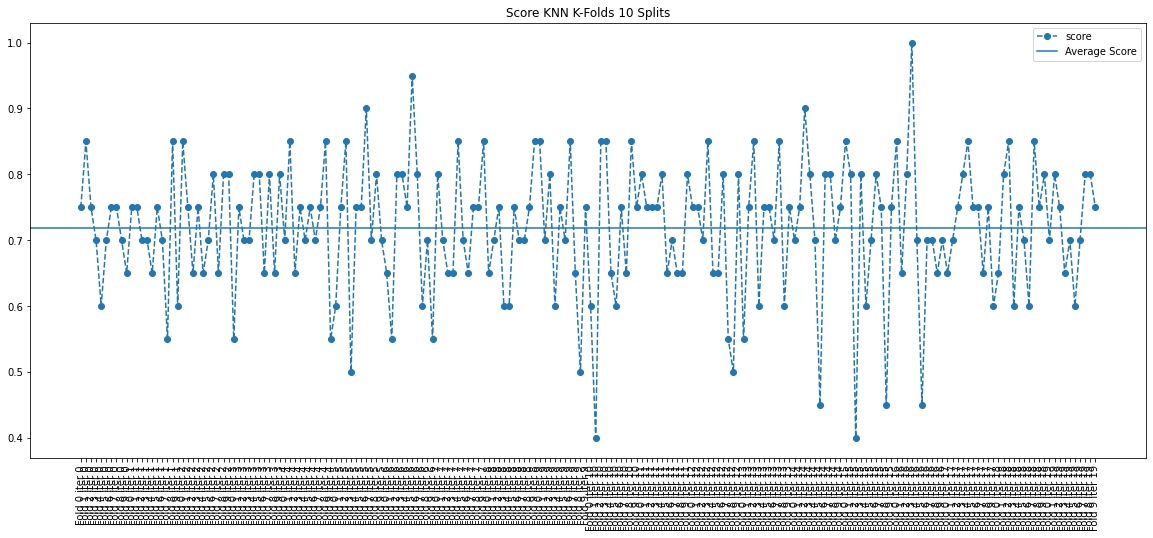

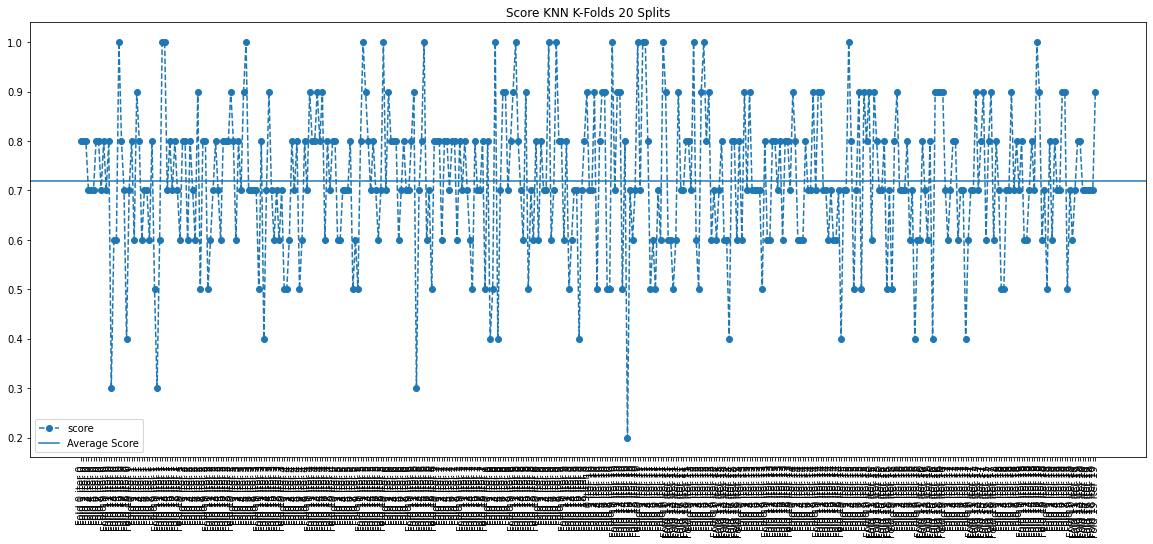

In [42]:
def score_knn(k, X, y, n):
    score = []
    labels = []
    knn = KNeighborsClassifier(n_neighbors=7)
    for i in range(n):
        kf = KFold(n_splits= k, shuffle=True)
        j = 0
        for train_index, test_index in kf.split(X): 
            X_train, X_test = np.asarray(X)[train_index], np.asarray(X)[test_index]
            y_train, y_test = np.asarray(y)[train_index], np.asarray(y)[test_index]
            knn.fit(X_train, y_train)
            labels.append('Fold '+str(j)+' iter '+str(i))
            j+=1
            score.append(knn.score(X_test, y_test))
    plt.figure(figsize=(20,8))
    plt.title('Score KNN K-Folds '+str(k)+" Splits" )
    plt.plot(labels,score, '--o', label = 'score')
    plt.axhline(y=np.average(score), c = 'r' label = 'Average Score')
    plt.xticks(rotation=90)
    plt.legend()

k = [5, 10, 20]
for k_n in k:
    score_knn(k_n,X,y, 20)

Notemos que los factores que afectan a la tasa de error en el algoritmo KNN son por ejemplo:
* Dimensionalidad de los puntos de datos, es decir, a mayor dimensión, menos confiable será el algoritmo KNN.
* El tamaño de K,ya que los vecinos devueltos K también afectan a la precisión, pues al usar la curva ROC podemos encontrar un valor adecuador de K para nuestro problema, donde si el K=1 este será muy ruidoso y es necesario de suavizar el problema.
* La distribución de los datos, esto afecta fácilmente al rendimiento, ya que a mayor concentración de puntos de datos, más sensibles serán a pequeños cambios.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf540245-6e07-40d3-9769-53449b677edd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>